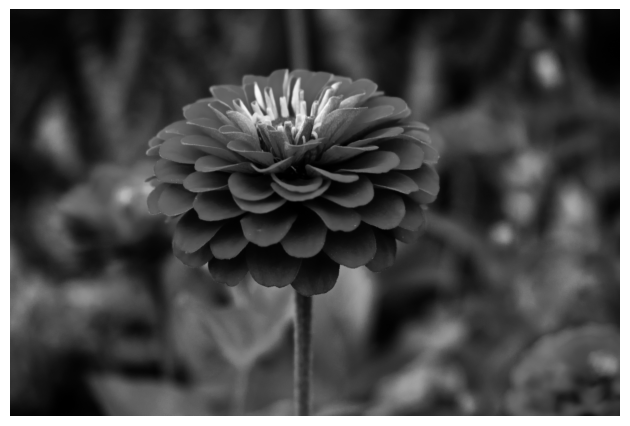

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity

image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")
plt.axis('off')
plt.tight_layout()

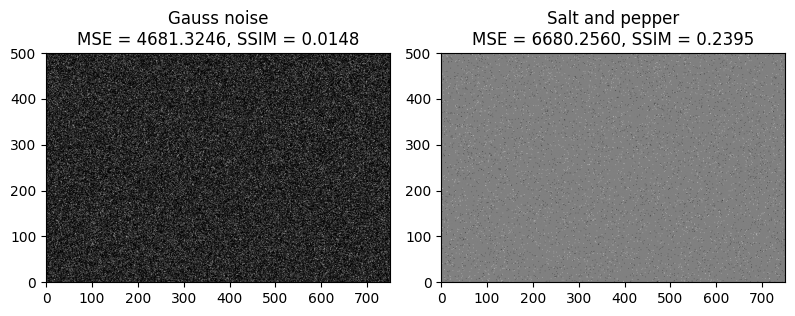

In [13]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
mse = mean_squared_error(image_gray, noise_gauss)
(ssim, diff) = structural_similarity(image_gray, noise_gauss, full=True)

# Salt and pepper
noise = np.random.randint(0, 101, size=(image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)
bg_image = np.ones(image_gray.shape, np.uint8) * 128
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255
mse_sp = mean_squared_error(image_gray, bg_image)
(ssim_sp, diff) = structural_similarity(image_gray, bg_image, full=True)

plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title(f'Gauss noise\nMSE = {mse:.4f}, SSIM = {ssim:.4f}')
plt.imshow(noise_gauss, cmap="gray")
plt.axis([0, 750, 0, 500])


plt.subplot(1, 3, 2)
plt.title(f'Salt and pepper\nMSE = {mse_sp:.4f}, SSIM = {ssim_sp:.4f}')
plt.imshow(bg_image, cmap="gray")
plt.axis([0, 750, 0, 500])


plt.tight_layout()
plt.show()

GAUSS NOISE FILTERS
 


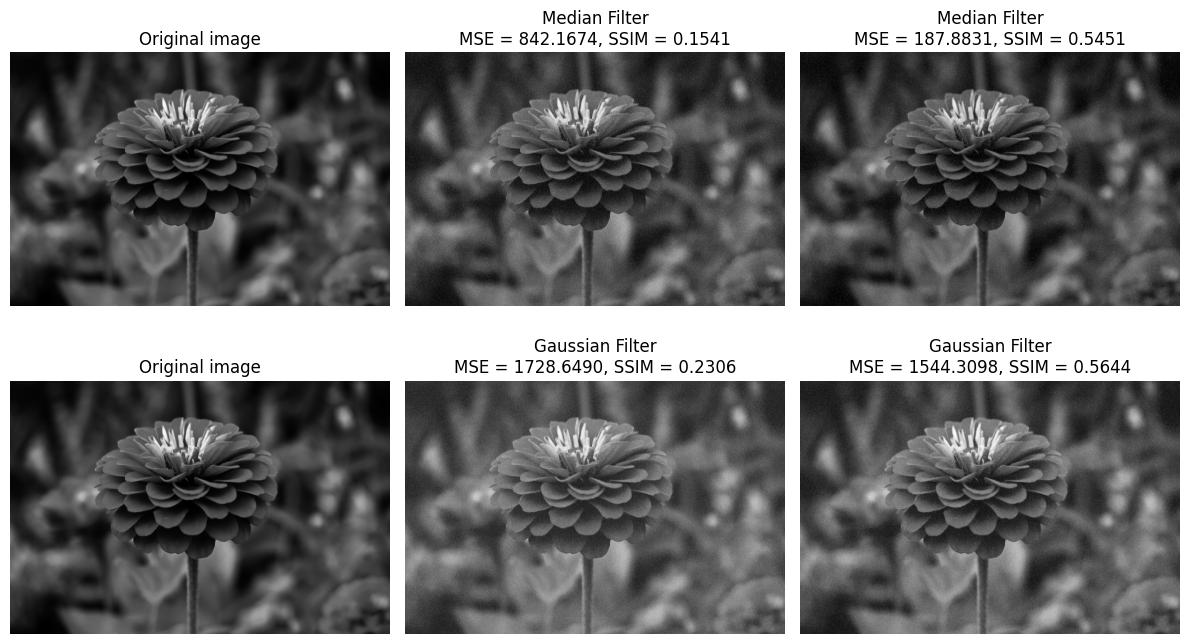

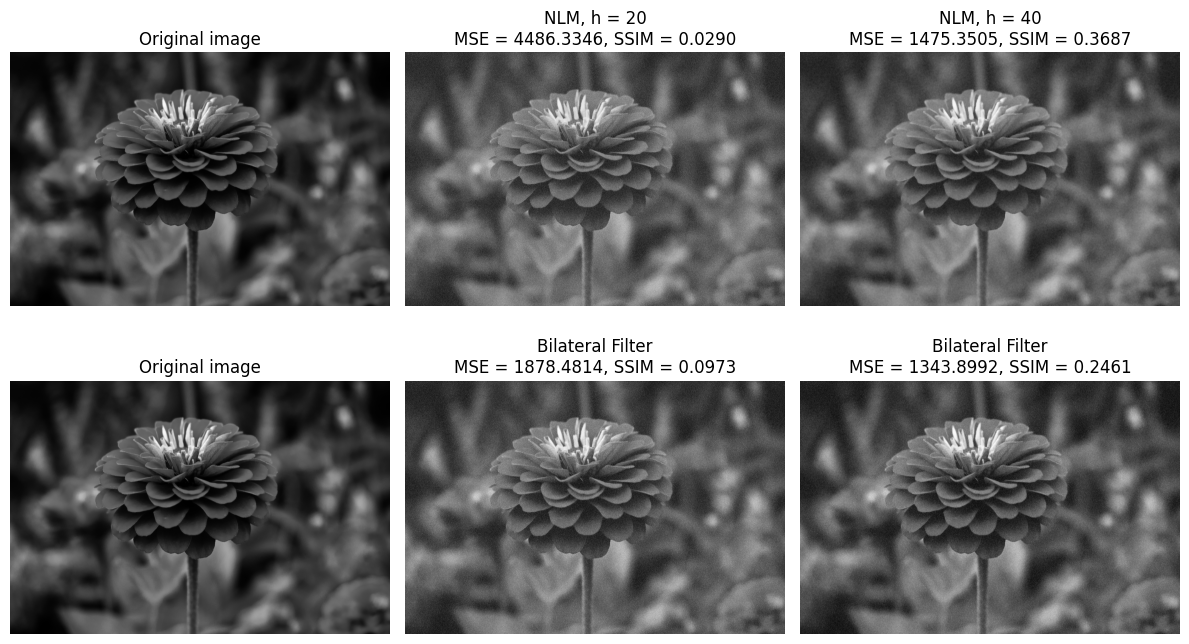

Лучший фильтр шума гаусса: Фильтр Гаусса 15х15 SSIM: 0.5644


In [16]:
print("GAUSS NOISE FILTERS")
print(" ")

best_ssim_gauss = 0
best_gauss_filter = ""

image_noise_gauss = cv2.add(image_gray,noise_gauss)
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)
image_gauss_gauss1 = cv2.GaussianBlur(image_noise_gauss,(15,15),0)

mse_gauss = mean_squared_error(image_gray, image_gauss_gauss)
(ssim, diff) = structural_similarity(image_gray, image_gauss_gauss, full=True)
if ssim > best_ssim_gauss:
    best_ssim_gauss = ssim
    best_gauss_filter = "Фильтр Гаусса 5х5"

mse_gauss1 = mean_squared_error(image_gray, image_gauss_gauss1)
(ssim1, diff) = structural_similarity(image_gray, image_gauss_gauss1, full=True)
if ssim1 > best_ssim_gauss:
    best_ssim_gauss = ssim1
    best_gauss_filter = "Фильтр Гаусса 15х15"


image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)
image_gauss_median1 = cv2.medianBlur(image_noise_gauss, 7)

mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray, image_gauss_median, full=True)
if ssim_gauss_median > best_ssim_gauss:
    best_ssim_gauss = ssim_gauss_median
    best_gauss_filter = "Медианный фильтр 3х3"

mse_gauss_median1 = mean_squared_error(image_gray, image_gauss_median1)
(ssim_gauss_median1, diff) = structural_similarity(image_gray, image_gauss_median1, full=True)
if ssim_gauss_median1 > best_ssim_gauss:
    best_ssim_gauss = ssim_gauss_median1
    best_gauss_filter = "Медианный фильтр 7х7"

plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title(f'Original image')
plt.imshow(image_gray, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'Gaussian Filter\nMSE = {mse_gauss:.4f}, SSIM = {ssim:.4f}')
plt.imshow(image_gauss_gauss, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f'Gaussian Filter\nMSE = {mse_gauss1:.4f}, SSIM = {ssim1:.4f}')
plt.imshow(image_gauss_gauss1, cmap="gray")
plt.axis('off')


plt.subplot(3, 3, 1)
plt.title(f'Original image')
plt.imshow(image_gray, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title(f'Median Filter\nMSE = {mse_gauss_median:.4f}, SSIM = {ssim_gauss_median:.4f}')
plt.imshow(image_gauss_median, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title(f'Median Filter\nMSE = {mse_gauss_median1:.4f}, SSIM = {ssim_gauss_median1:.4f}')
plt.imshow(image_gauss_median1, cmap="gray")
plt.axis('off')

plt.tight_layout()
plt.show()


image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,7,75,75)
image_gauss_bilat1 = cv2.bilateralFilter(image_noise_gauss,10,110,110)

mse_gauss_bilat = mean_squared_error(image_gray, image_gauss_bilat)
(ssim_gauss_bilat, diff) = structural_similarity(image_gray, image_gauss_bilat, full=True)
if ssim_gauss_bilat > best_ssim_gauss:
    best_ssim_gauss = ssim_gauss_bilat
    best_gauss_filter = "Билатеральный фильтр (7,75,75)"

mse_gauss_bilat1 = mean_squared_error(image_gray, image_gauss_bilat1)
(ssim_gauss_bilat1, diff) = structural_similarity(image_gray, image_gauss_bilat1, full=True)
if ssim_gauss_bilat1 > best_ssim_gauss:
    best_ssim_gauss = ssim_gauss_bilat1
    best_gauss_filter = "Билатеральный фильтр (10,100,100)"


image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)
image_gauss_nlm1 = cv2.fastNlMeansDenoising(image_noise_gauss, h = 40)

mse_gauss_nlm = mean_squared_error(image_gray, image_gauss_nlm)
(ssim_gauss_nlm, diff) = structural_similarity(image_gray, image_gauss_nlm, full=True)
if ssim_gauss_nlm > best_ssim_gauss:
    best_ssim_gauss = ssim_gauss_nlm
    best_gauss_filter = "NLM фильтр (h = 20)"

mse_gauss_nlm1 = mean_squared_error(image_gray, image_gauss_nlm1)
(ssim_gauss_nlm1, diff) = structural_similarity(image_gray, image_gauss_nlm1, full=True)
if ssim_gauss_nlm1 > best_ssim_gauss:
    best_ssim_gauss = ssim_gauss_nlm1
    best_gauss_filter = "NLM фильтр (h = 40)"

plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title(f'Original image')
plt.imshow(image_gray, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'Bilateral Filter\nMSE = {mse_gauss_bilat:.4f}, SSIM = {ssim_gauss_bilat:.4f}')
plt.imshow(image_gauss_bilat, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f'Bilateral Filter\nMSE = {mse_gauss_bilat1:.4f}, SSIM = {ssim_gauss_bilat1:.4f}')
plt.imshow(image_gauss_bilat1, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 1)
plt.title(f'Original image')
plt.imshow(image_gray, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title(f'NLM, h = 20\nMSE = {mse_gauss_nlm:.4f}, SSIM = {ssim_gauss_nlm:.4f}')
plt.imshow(image_gauss_nlm, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title(f'NLM, h = 40\nMSE = {mse_gauss_nlm1:.4f}, SSIM = {ssim_gauss_nlm1:.4f}')
plt.imshow(image_gauss_nlm1, cmap="gray")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f'Лучший фильтр шума гаусса: {best_gauss_filter} SSIM: {best_ssim_gauss:.4f}')

SALT AND PEPPER FILTERS
 


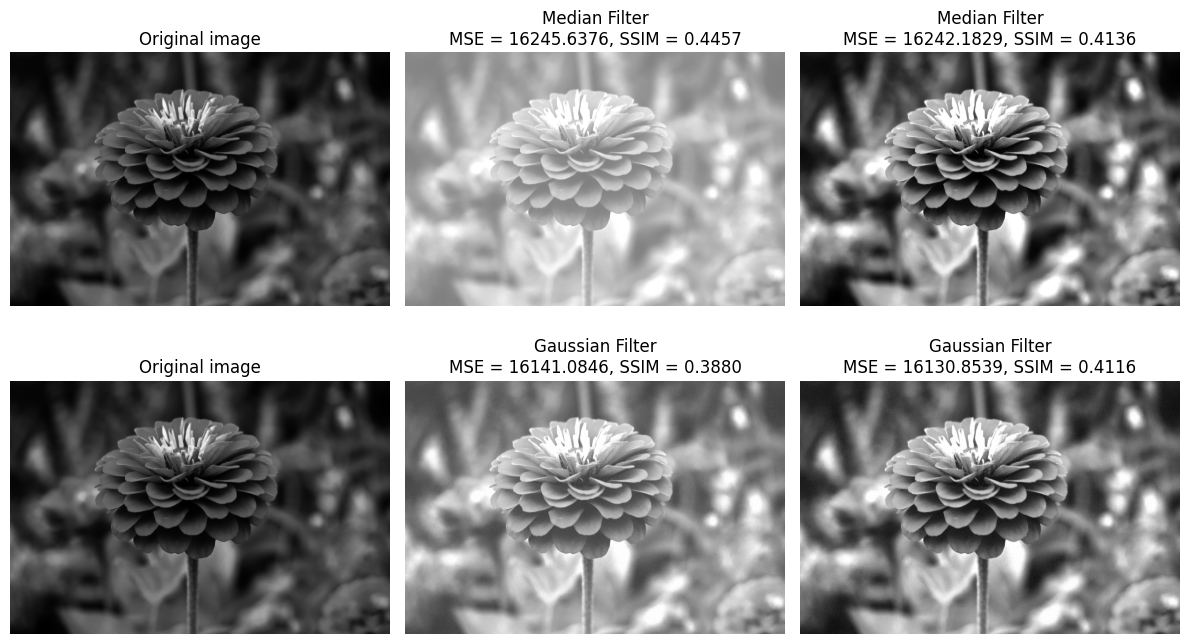

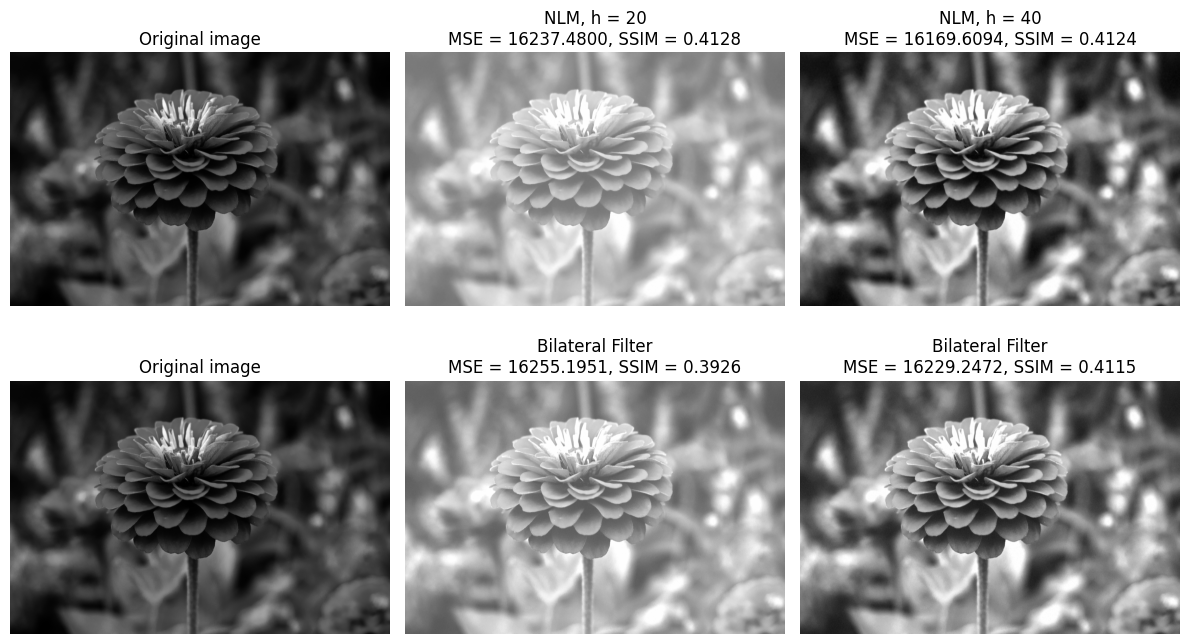

Лучший фильтр постоянного шума: Медианный фильтр 3х3 SSIM: 0.4457


In [17]:
print("SALT AND PEPPER FILTERS")
print(" ")

best_ssim_salt = 0
best_salt_filter = ""

image_salt_pepper = cv2.add(image_gray, bg_image)
image_salt_gauss = cv2.GaussianBlur(image_salt_pepper, (5, 5), 0)
image_salt_gauss1 = cv2.GaussianBlur(image_salt_pepper, (15, 15), 0)

mse_gauss = mean_squared_error(image_gray, image_salt_gauss)
(ssim, diff) = structural_similarity(image_gray, image_salt_gauss, full=True)
if ssim > best_ssim_salt:
    best_ssim_salt = ssim
    best_salt_filter = "Фильтр Гаусса 5х5"

mse_gauss1 = mean_squared_error(image_gray, image_salt_gauss1)
(ssim1, diff) = structural_similarity(image_gray, image_salt_gauss1, full=True)
if ssim1 > best_ssim_salt:
    best_ssim_salt = ssim1
    best_salt_filter = "Фильтр Гаусса 15х15"

image_salt_median = cv2.medianBlur(image_salt_pepper, 3)
image_salt_median1 = cv2.medianBlur(image_salt_pepper, 7)

mse_salt_median = mean_squared_error(image_gray, image_salt_median)
(ssim_salt_median, diff) = structural_similarity(image_gray, image_salt_median, full=True)
if ssim_salt_median > best_ssim_salt:
    best_ssim_salt = ssim_salt_median
    best_salt_filter = "Медианный фильтр 3х3"

mse_salt_median1 = mean_squared_error(image_gray, image_salt_median1)
(ssim_salt_median1, diff) = structural_similarity(image_gray, image_salt_median1, full=True)
if ssim_salt_median1 > best_ssim_salt:
    best_ssim_salt = ssim_salt_median1
    best_salt_filter = "Медианный фильтр 7х7"

plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title(f'Original image')
plt.imshow(image_gray, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'Gaussian Filter\nMSE = {mse_gauss:.4f}, SSIM = {ssim:.4f}')
plt.imshow(image_salt_gauss, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f'Gaussian Filter\nMSE = {mse_gauss1:.4f}, SSIM = {ssim1:.4f}')
plt.imshow(image_salt_gauss1, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 1)
plt.title(f'Original image')
plt.imshow(image_gray, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title(f'Median Filter\nMSE = {mse_salt_median:.4f}, SSIM = {ssim_salt_median:.4f}')
plt.imshow(image_salt_median, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title(f'Median Filter\nMSE = {mse_salt_median1:.4f}, SSIM = {ssim_salt_median1:.4f}')
plt.imshow(image_salt_median1, cmap="gray")
plt.axis('off')

plt.tight_layout()
plt.show()

image_salt_bilat = cv2.bilateralFilter(image_salt_pepper,7,75,75)
image_salt_bilat1 = cv2.bilateralFilter(image_salt_pepper,10,110,110)

mse_salt_bilat = mean_squared_error(image_gray, image_salt_bilat)
(ssim_salt_bilat, diff) = structural_similarity(image_gray, image_salt_bilat, full=True)
if ssim_salt_bilat > best_ssim_salt:
    best_ssim_salt = ssim_salt_bilat
    best_salt_filter = "Билатеральный фильтр (7,75,75)"

mse_salt_bilat1 = mean_squared_error(image_gray, image_salt_bilat1)
(ssim_salt_bilat1, diff) = structural_similarity(image_gray, image_salt_bilat1, full=True)
if ssim_salt_bilat1 > best_ssim_salt:
    best_ssim_salt = ssim_salt_bilat1
    best_salt_filter = "Билатеральный фильтр (10,100,100)"


image_salt_nlm = cv2.fastNlMeansDenoising(image_salt_pepper, h = 20)
image_salt_nlm1 = cv2.fastNlMeansDenoising(image_salt_pepper, h = 40)

mse_salt_nlm = mean_squared_error(image_gray, image_salt_nlm)
(ssim_salt_nlm, diff) = structural_similarity(image_gray, image_salt_nlm, full=True)
if ssim_salt_nlm > best_ssim_salt:
    best_ssim_salt = ssim_salt_nlm
    best_salt_filter = "NLM фильтр (h = 20)"

mse_salt_nlm1 = mean_squared_error(image_gray, image_salt_nlm1)
(ssim_salt_nlm1, diff) = structural_similarity(image_gray, image_salt_nlm1, full=True)
if ssim_salt_nlm1 > best_ssim_salt:
    best_ssim_salt = ssim_salt_nlm1
    best_salt_filter = "NLM фильтр (h = 40)"

plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title(f'Original image')
plt.imshow(image_gray, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'Bilateral Filter\nMSE = {mse_salt_bilat:.4f}, SSIM = {ssim_salt_bilat:.4f}')
plt.imshow(image_salt_bilat, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f'Bilateral Filter\nMSE = {mse_salt_bilat1:.4f}, SSIM = {ssim_salt_bilat1:.4f}')
plt.imshow(image_salt_bilat1, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 1)
plt.title(f'Original image')
plt.imshow(image_gray, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title(f'NLM, h = 20\nMSE = {mse_salt_nlm:.4f}, SSIM = {ssim_salt_nlm:.4f}')
plt.imshow(image_salt_nlm, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title(f'NLM, h = 40\nMSE = {mse_salt_nlm1:.4f}, SSIM = {ssim_salt_nlm1:.4f}')
plt.imshow(image_salt_nlm1, cmap="gray")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f'Лучший фильтр постоянного шума: {best_salt_filter} SSIM: {best_ssim_salt:.4f}')